In [6]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4


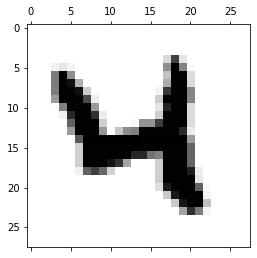

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [7]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [10]:
#THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # Max pooling 2D
    model.add(MaxPooling2D(pool_size=(2,2)))
    # second convolutional layer with 16 filters
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # Max pooling 2D
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(100,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"), 
                  metrics=['accuracy'])
    return model

print('Model architecture created successfully!')

print('Model compiled successfully and ready to be trained.')

Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [11]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_CNN = create_CNN()

# train CNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 1.1092 - accuracy: 0.6279 - val_loss: 0.2152 - val_accuracy: 0.9374
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3870 - accuracy: 0.8813 - val_loss: 0.1378 - val_accuracy: 0.9556
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2706 - accuracy: 0.9189 - val_loss: 0.1014 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2069 - accuracy: 0.9392 - val_loss: 0.0803 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1752 - accuracy: 0.9485 - val_loss: 0.0774 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1538 - accuracy: 0.9556 - val_loss: 0.0653 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1395 - accuracy: 0.9590 - val_loss: 0.0554 -

313/313 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9834

Test loss: 0.05214928463101387
Test accuracy: 0.9833999872207642


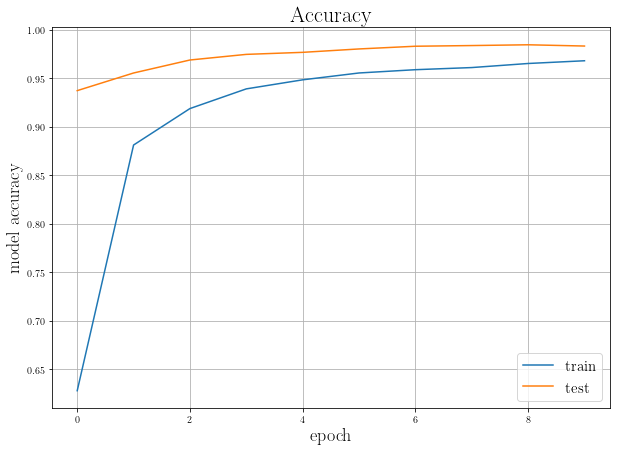

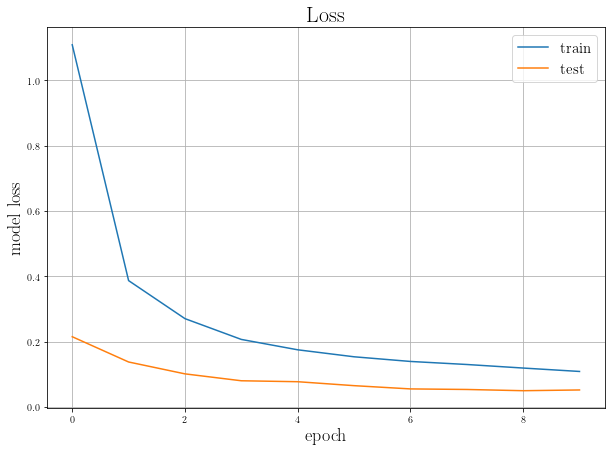

In [13]:
# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

# summarize history for accuracy
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy', fontsize=22)
plt.ylabel('model accuracy', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='best', fontsize=15)
plt.grid(True)
plt.show()

# summarize history for loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss', fontsize=22)
plt.ylabel('model loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='best', fontsize=15)
plt.grid(True)
plt.show();

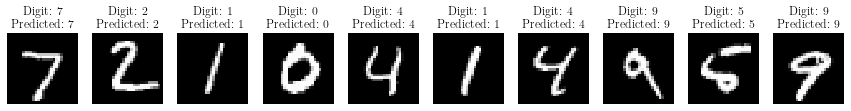

In [15]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [16]:
save_model_path='CNN/Saved/SGD'
model_CNN.save(filepath=save_model_path, include_optimizer=True)

INFO:tensorflow:Assets written to: CNN/Saved/SGD/assets


In [20]:
save_model_path='CNN/Saved/SGD'
model_CNN = tf.keras.models.load_model(filepath=save_model_path)

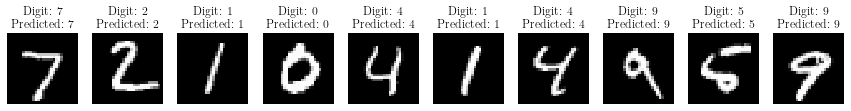

In [21]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()